<a href="https://colab.research.google.com/github/Itiel-z/Intro-to-AI-colab/blob/main/Assignment_11/Assignment_11_Intro2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 11 - Itiel

In [40]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.svm import SVC

In [18]:
# Extract the ZIP
zip_path = "/content/images.zip"
extract_dir = "images\images"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [24]:

IMG_SIZE = (64, 64)
X = []
y = []

VALID_EXTENSIONS = ('.jpg', '.jpeg', '.png')

extract_dir = 'images/images'  # adjust as needed

for class_dir in os.listdir(extract_dir):
    class_path = os.path.join(extract_dir, class_dir)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(VALID_EXTENSIONS):
                img_path = os.path.join(class_path, img_file)
                try:
                    img = imread(img_path)
                    img_resized = resize(img, IMG_SIZE, anti_aliasing=True)
                    X.append(img_resized.flatten())  # flatten for Random Forest
                    y.append(class_dir)
                except Exception as e:
                    print(f"❌ Failed to load {img_path}: {e}")
            else:
                print(f"⚠️ Skipped non-image file: {img_file}")

X = np.array(X)
y = LabelEncoder().fit_transform(y)

print(f"✅ Successfully loaded {len(X)} images across {len(set(y))} classes.")


✅ Successfully loaded 309 images across 5 classes.


In [28]:
# Normalize pixel values
X = X / 255.0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Parameter Grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
best_rf = grid.best_estimator_

Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Accuracy: 0.7419354838709677
Precision: 0.731111111111111
Recall: 0.7211111111111111
F1 Score: 0.7219699093542659


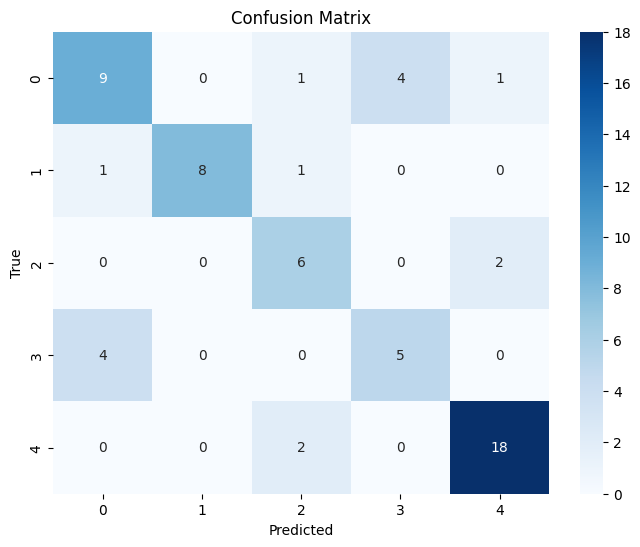


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       1.00      0.80      0.89        10
           2       0.60      0.75      0.67         8
           3       0.56      0.56      0.56         9
           4       0.86      0.90      0.88        20

    accuracy                           0.74        62
   macro avg       0.73      0.72      0.72        62
weighted avg       0.75      0.74      0.74        62



In [33]:
y_pred = best_rf.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

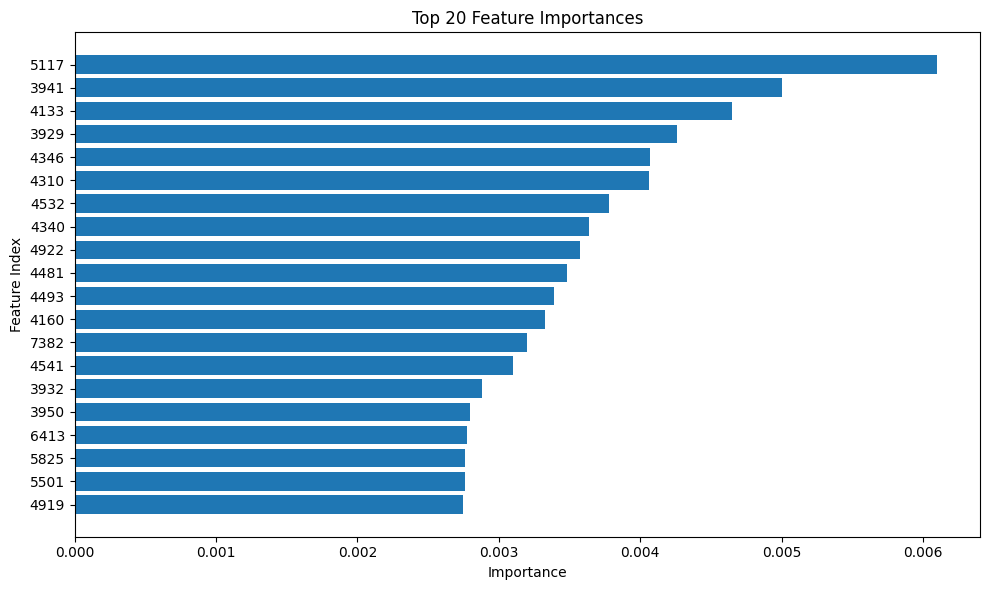

In [34]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20

plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.xlabel("Importance")
plt.ylabel("Feature Index")
plt.yticks(range(len(indices)), indices)
plt.tight_layout()
plt.show()


In [39]:
def predict_image(img_path, model):
    img = imread(img_path)
    img_resized = resize(img, IMG_SIZE, anti_aliasing=True)
    img_flat = img_resized.flatten().reshape(1, -1) / 255.0
    pred = model.predict(img_flat)
    return pred[0]

# Testing
new_image_path = "/content/images/images/sunflower/image_0044.jpg"
predicted_class = predict_image(new_image_path, best_rf)
print("Predicted class:", predicted_class)


Predicted class: 4


In [41]:
# SVM Comparison
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, average='macro'))

SVM Accuracy: 0.7258064516129032
SVM F1 Score: 0.6991253997061618
